In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.shape

(1599, 12)

In [4]:
column = data.columns

In [5]:
column

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# The dataset shows the ranking of the quality of the dataset from 0-10 0 being the lowest and 10 being the highest

<AxesSubplot:>

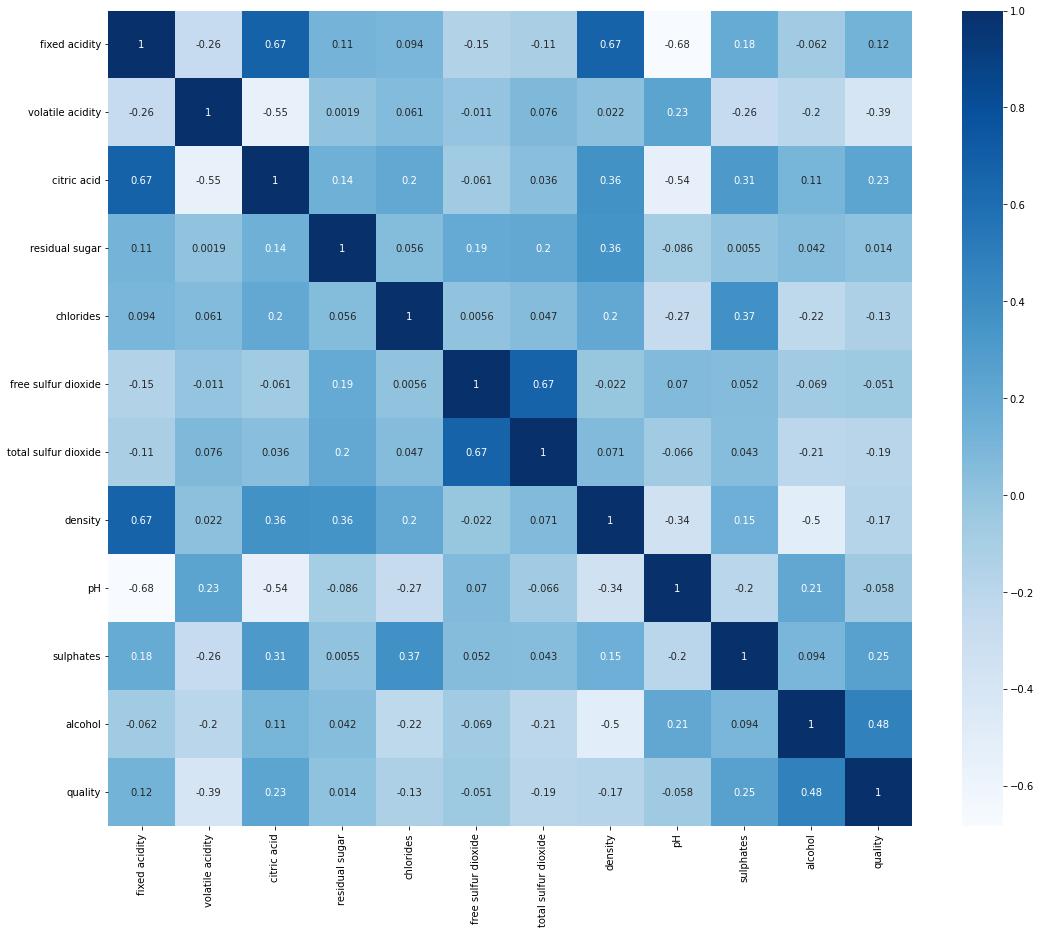

In [7]:
corr = data.corr()
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr, cmap="Blues", annot=True)

In [8]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [9]:
# Three classes low medium and high
# 0-4 -> 0
# 5 -> 1
#6-7 -> 2
# 8-10 3

In [10]:
ranges = [0, 4, 5, 7, 10]
labels = [0, 1, 2, 3]

In [11]:
data['quality_label'] = np.select(
    [data['quality'].between(ranges[i], ranges[i+1], inclusive='right') for i in range(len(labels))],
    labels,
    default=''
)

In [12]:
df_y = data["quality_label"]

In [13]:
df_y

0       1
1       1
2       1
3       2
4       1
       ..
1594    1
1595    2
1596    2
1597    1
1598    2
Name: quality_label, Length: 1599, dtype: object

In [14]:
df_y = df_y.astype(int)

In [15]:
df_y.value_counts()

quality_label
2    837
1    681
0     63
3     18
Name: count, dtype: int64

In [16]:
df_y.shape

(1599,)

In [17]:
df_y = df_y.values.reshape(-1, 1)

In [18]:
data["quality_label"].value_counts()

quality_label
2    837
1    681
0     63
3     18
Name: count, dtype: int64

In [19]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

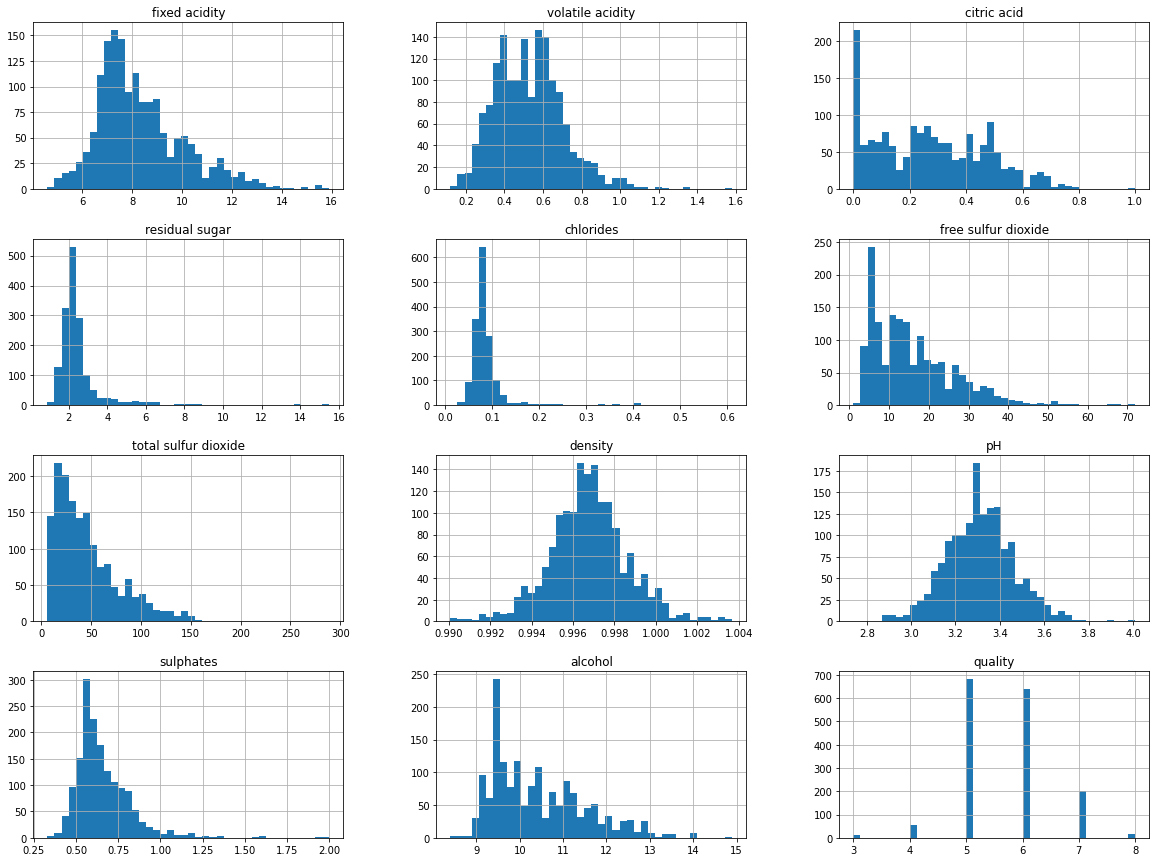

In [20]:
data.hist(bins=40, figsize=(20,15))

<BarContainer object of 1599 artists>

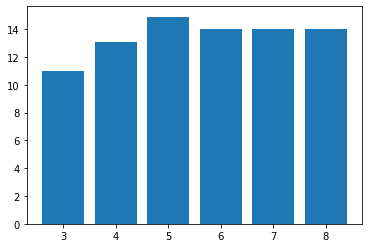

In [21]:
# plt.bar(data["quality_label"], data["alcohol"])
plt.bar(data["quality"], data["alcohol"])

In [22]:
df_y.shape

(1599, 1)

In [23]:
df_x = data.drop(columns=["quality", "quality_label"])
# df_x = data.drop(columns=["quality"])

In [24]:
df_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [25]:
# Entropy
from sklearn.tree import DecisionTreeClassifier

In [26]:
classifier_1 = DecisionTreeClassifier(criterion="entropy")

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=1/3, random_state=20)

In [29]:
train_y

array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]])

In [30]:
# train_y = train_y.astype(int)
# test_y = test_y.astype(int)

In [31]:
train_y.dtype

dtype('int32')

In [32]:
train_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4
239,8.2,1.000,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
599,12.7,0.590,0.45,2.3,0.082,11.0,22.0,1.00000,3.00,0.70,9.3
802,5.1,0.585,0.00,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9
...,...,...,...,...,...,...,...,...,...,...,...
924,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2
1247,7.4,0.550,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5
271,11.5,0.180,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1
474,10.5,0.280,0.51,1.7,0.080,10.0,24.0,0.99820,3.20,0.89,9.4


In [33]:
test_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1508,7.1,0.270,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6
718,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6
1370,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2
579,10.6,0.310,0.49,2.2,0.063,18.0,40.0,0.99760,3.14,0.51,9.8
498,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
...,...,...,...,...,...,...,...,...,...,...,...
1314,7.0,0.360,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1
90,7.9,0.520,0.26,1.9,0.079,42.0,140.0,0.99640,3.23,0.54,9.5
1306,9.7,0.690,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1
1557,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0


In [34]:
train_y.shape

(1066, 1)

In [35]:
classifier_1 = classifier_1.fit(train_x, train_y)

In [36]:
y_pred = classifier_1.predict(test_x)

In [37]:
type(y_pred[1])

numpy.int32

In [38]:
from sklearn.metrics import classification_report, accuracy_score

In [39]:
print(accuracy_score(test_y, y_pred))

0.7035647279549718


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

In [41]:
import seaborn as sns

In [44]:
test_x.shape

(533, 11)

In [46]:
cm.flatten().sum()

533

Text(87.0, 0.5, 'True Class')

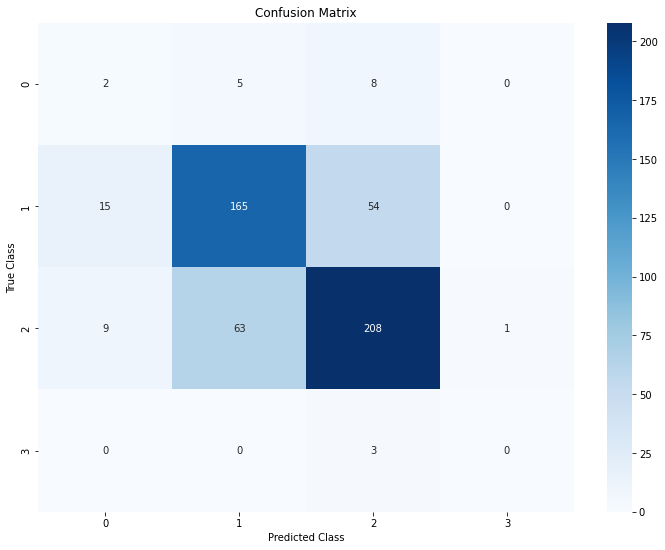

In [47]:
plt.figure(figsize=(12, 9))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt="", cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [48]:
train_x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [49]:
feature_importance = classifier_1.feature_importances_

In [50]:
feature_importance

array([0.05013463, 0.10094559, 0.07100302, 0.07746419, 0.07020693,
       0.04647339, 0.09684912, 0.07775363, 0.07465512, 0.13120238,
       0.20331199])

In [51]:
#  This sorts the values in the feature importances in a descending order
sorted_indices = feature_importance.argsort()[::-1]

In [52]:
#  The sorted importance sorts the imporance values using the indices provided
sorted_importance = feature_importance[sorted_indices]

In [53]:
# Sorts the features of the datset in the sorted manner
sorted_features = train_x.columns[sorted_indices]

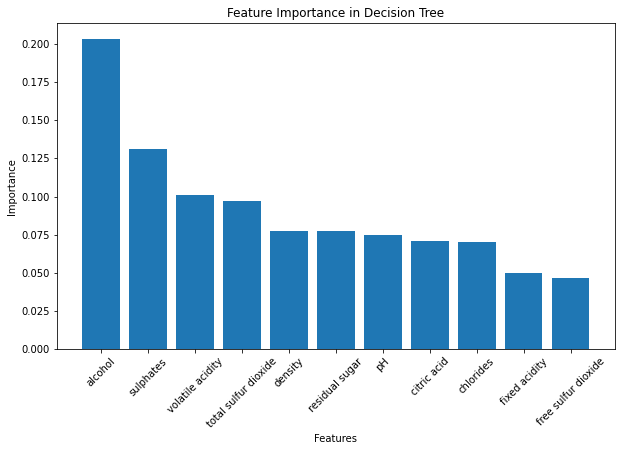

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=45)
plt.show()

In [55]:
from sklearn.metrics import classification_report, accuracy_score

In [56]:
report1 = classification_report(y_pred, test_y)

In [57]:
print(report1)

              precision    recall  f1-score   support

           0       0.13      0.08      0.10        26
           1       0.71      0.71      0.71       233
           2       0.74      0.76      0.75       273
           3       0.00      0.00      0.00         1

    accuracy                           0.70       533
   macro avg       0.39      0.39      0.39       533
weighted avg       0.69      0.70      0.70       533



In [58]:
column

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [59]:
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [60]:
labels_s = []
for i in labels:
    labels_s.append(str(i))


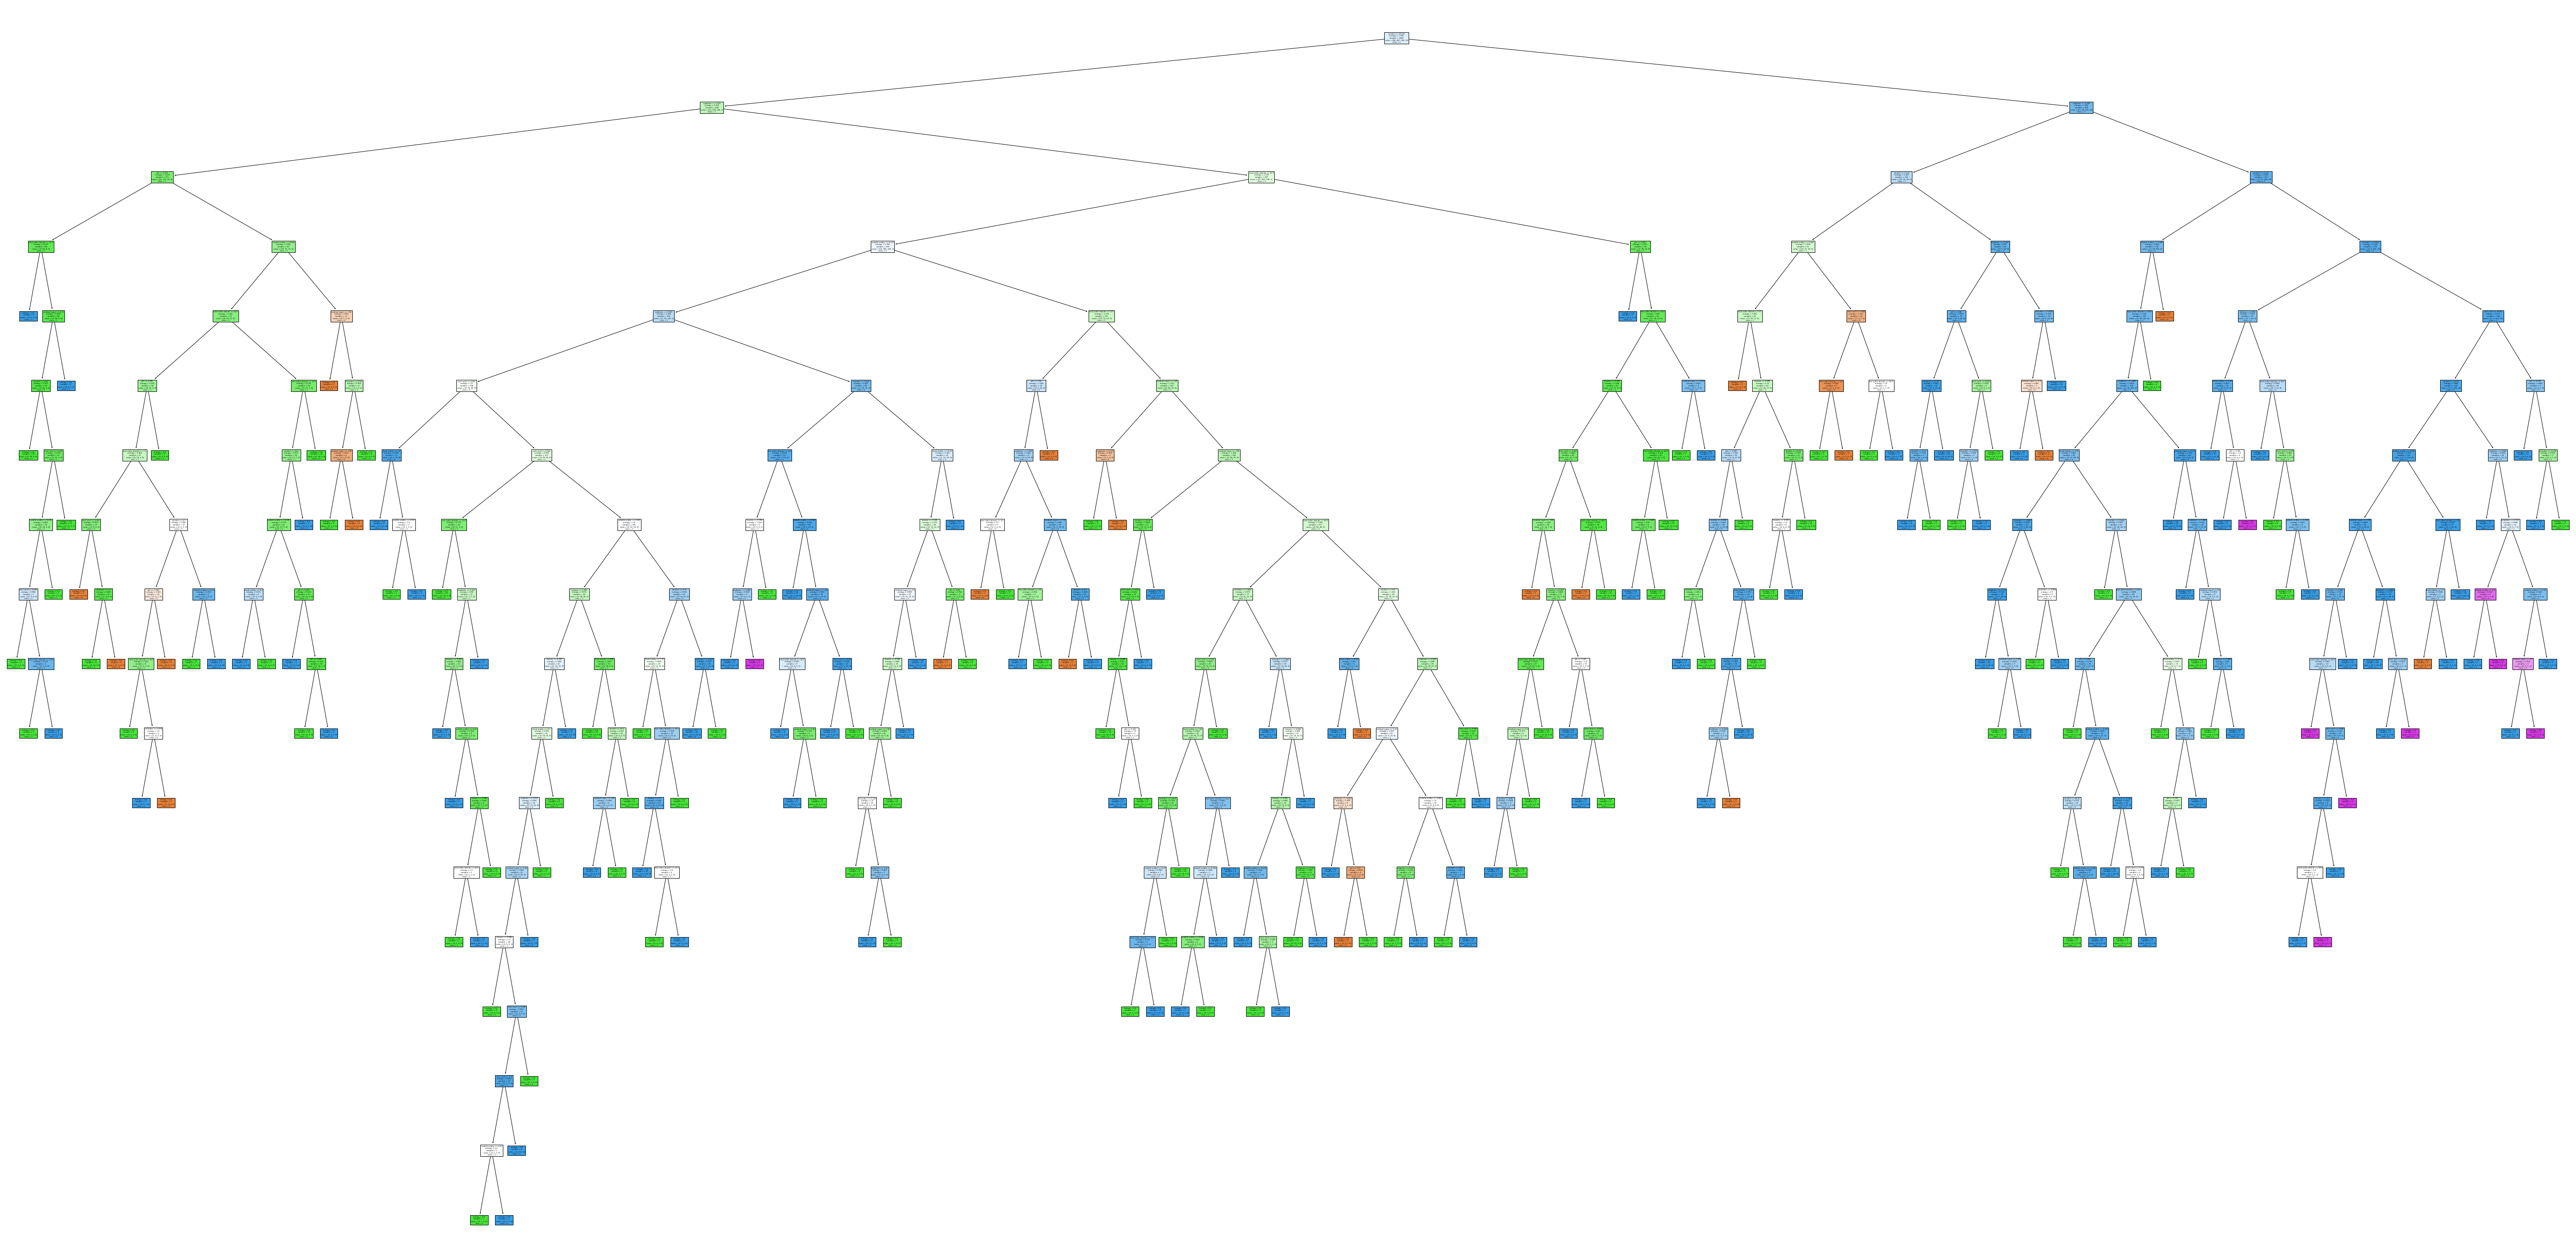

In [65]:
from sklearn import tree
# plt.figure(figsize=(40,20))
# tree.plot_tree(classifier_1)
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(classifier_1, 
                   feature_names=feature_names,  
                   class_names=labels_s,
                   filled=True
                   )

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
scores = cross_val_score(classifier_1, df_x, df_y, cv=5)

In [51]:
scores.mean()

0.7291927899686521

In [52]:
y_pred_train = classifier_1.predict(train_x)
accuracy_score(train_y, y_pred_train)

1.0

In [59]:
column

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [64]:
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [65]:
feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [71]:
labels_s = []
for i in labels:
    labels_s.append(str(i))


In [72]:
labels_s

['0', '1', '2']

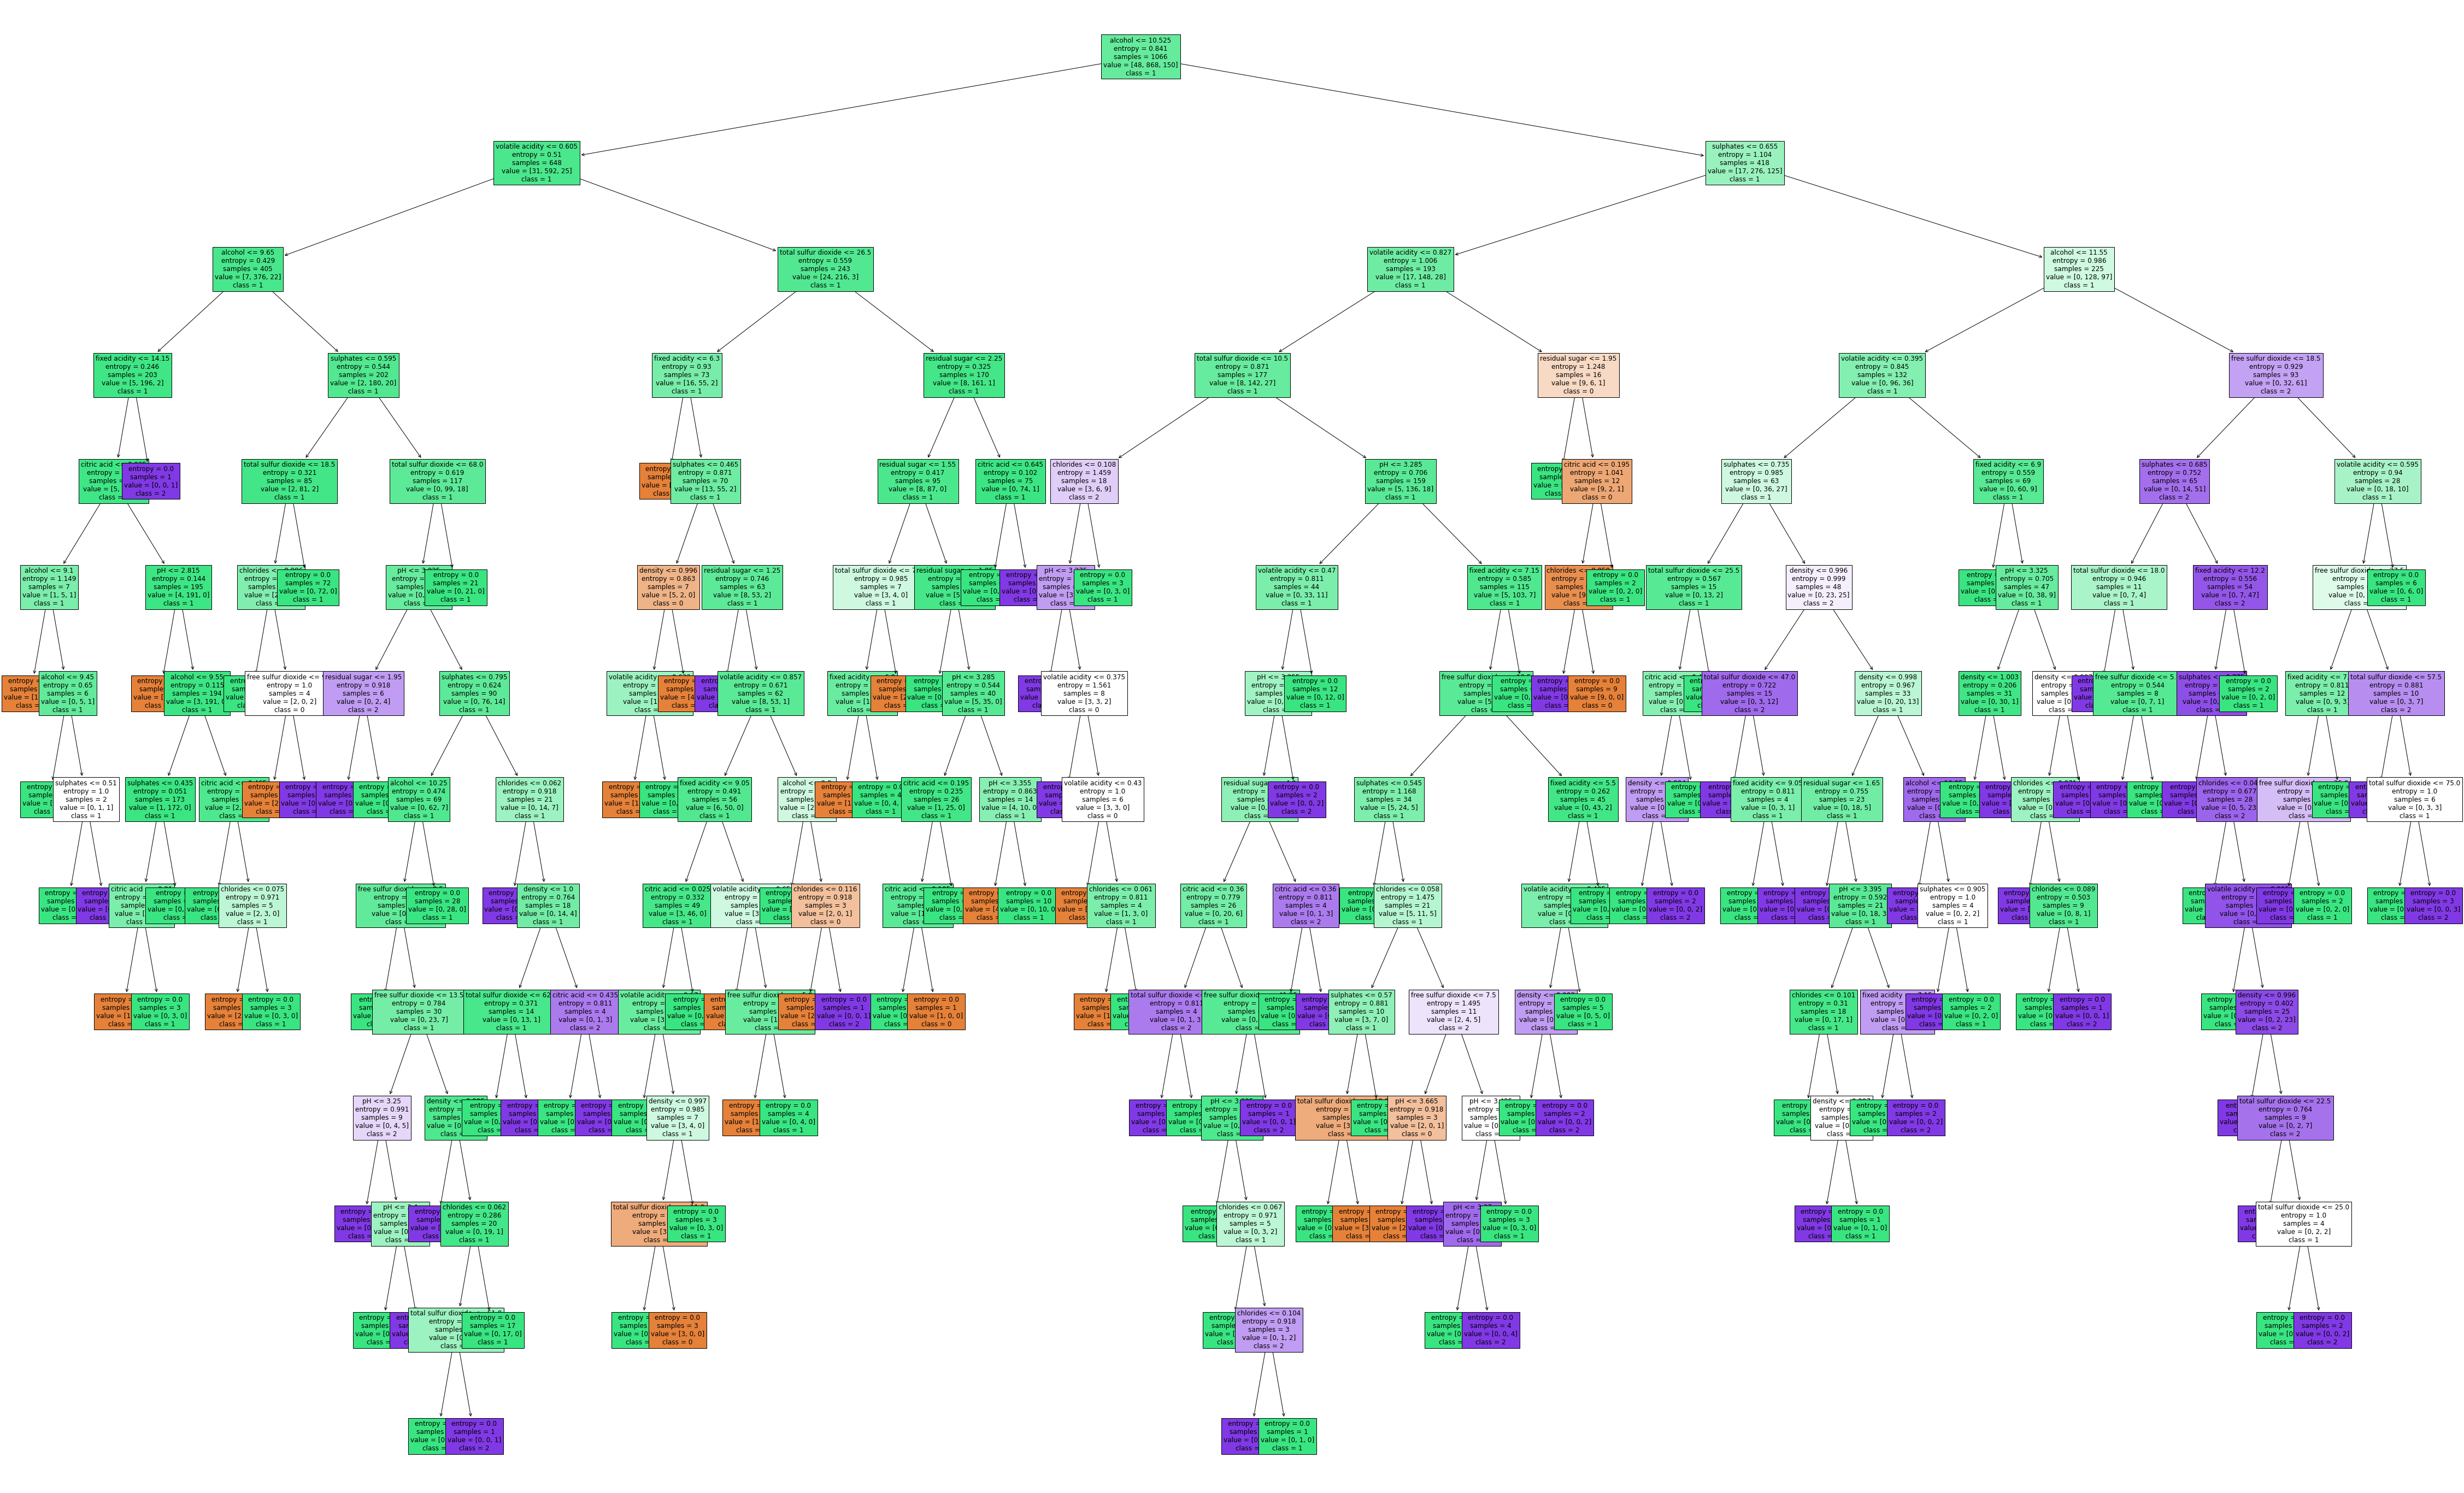

In [79]:
fig = plt.figure(figsize=(80,50))
_ = tree.plot_tree(classifier_1, 
                   feature_names=feature_names,  
                   class_names=labels_s,
                   filled=True,
                   fontsize=12
                   )

In [80]:
classifier_2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [81]:
classifier_2.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [82]:
y_pred_2 = classifier_2.predict(test_x)

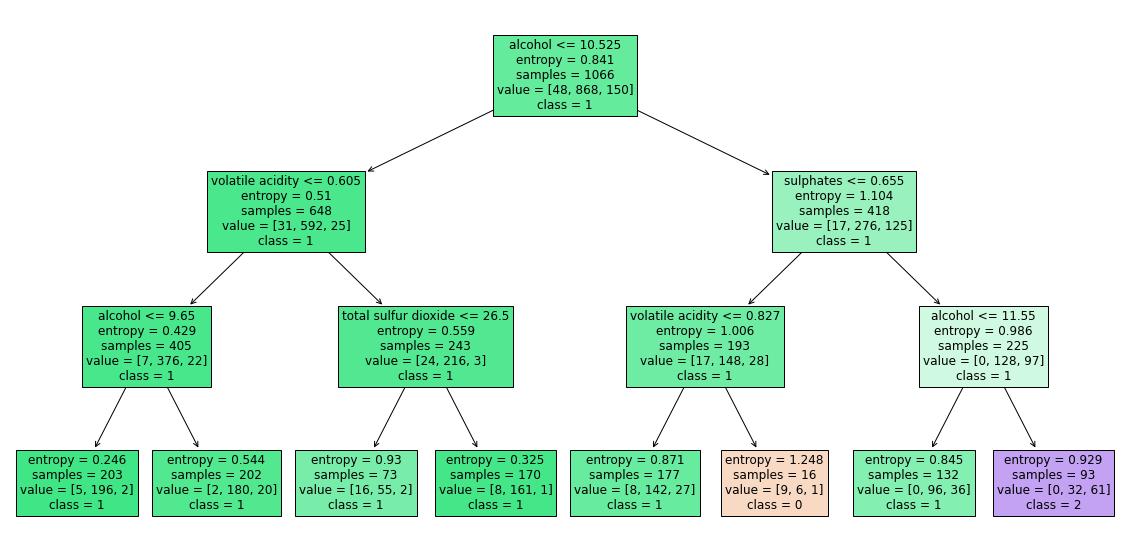

In [85]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(classifier_2, 
                   feature_names=feature_names,  
                   class_names=labels_s,
                   filled=True,
                   fontsize=12
                   )

In [98]:
classifier_3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=10, min_samples_leaf=2)

In [99]:
classifier_3.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=10)

In [100]:
y_pred_3 = classifier_2.predict(test_x)

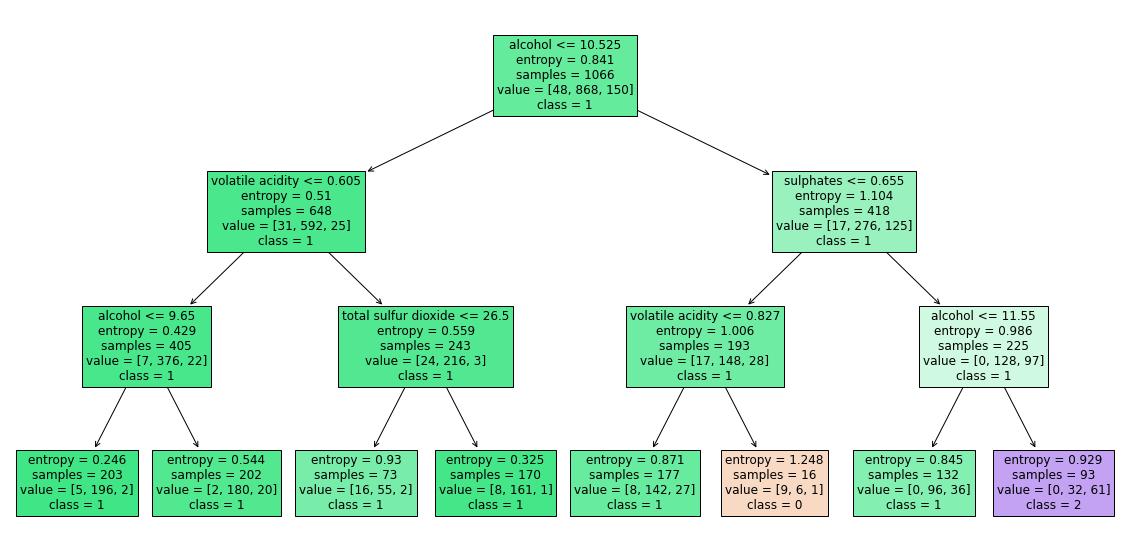

In [101]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(classifier_3, 
                   feature_names=feature_names,  
                   class_names=labels_s,
                   filled=True,
                   fontsize=12
                   )

In [103]:
path = classifier_1.cost_complexity_pruning_path(train_x, train_y)

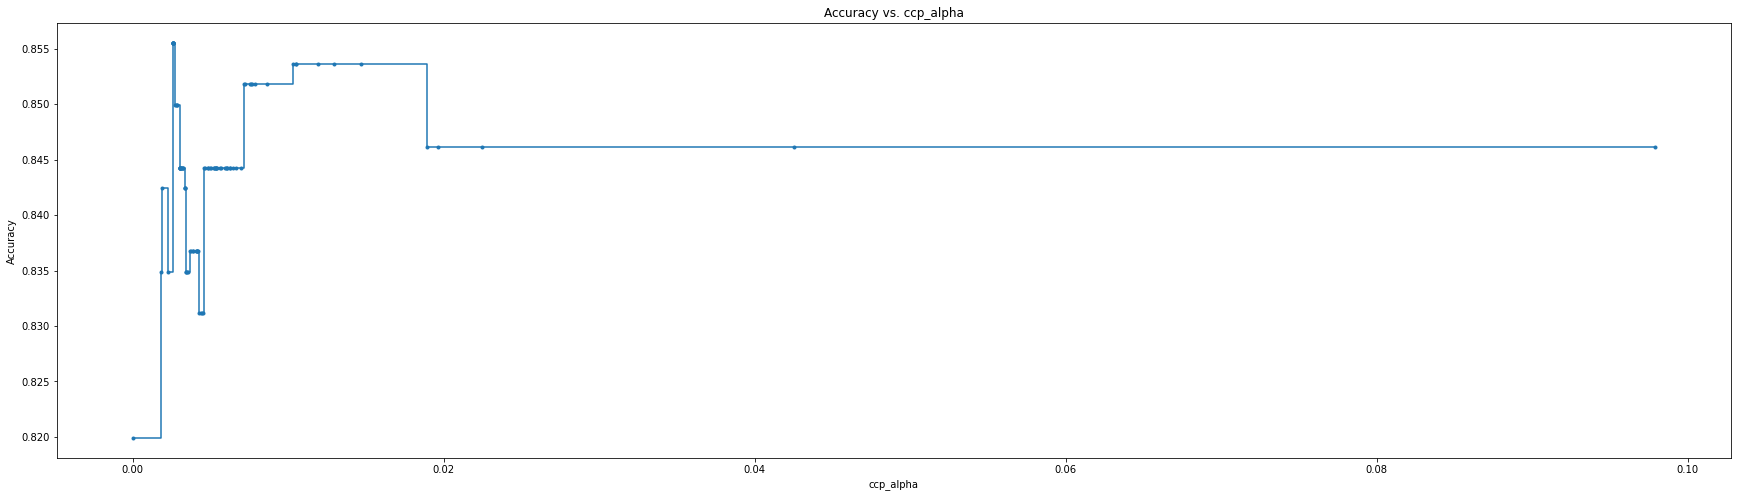

In [118]:
# Extract different values of ccp_alpha and corresponding accuracy scores
ccp_alphas = path.ccp_alphas
scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    accuracy = accuracy_score(test_y, y_pred)
    scores.append(accuracy)

# Plot the accuracy scores as a function of ccp_alpha
fig = plt.figure(figsize=(30,8))
plt.plot(ccp_alphas, scores, marker='.', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. ccp_alpha")
plt.show()

In [110]:
np.array(scores).argmax()

4

In [111]:
ccp_alphas[4]

0.0025843222346749236